In [1]:
### Import the libraries
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.datasets import mnist


### Load the dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### Exploring the images

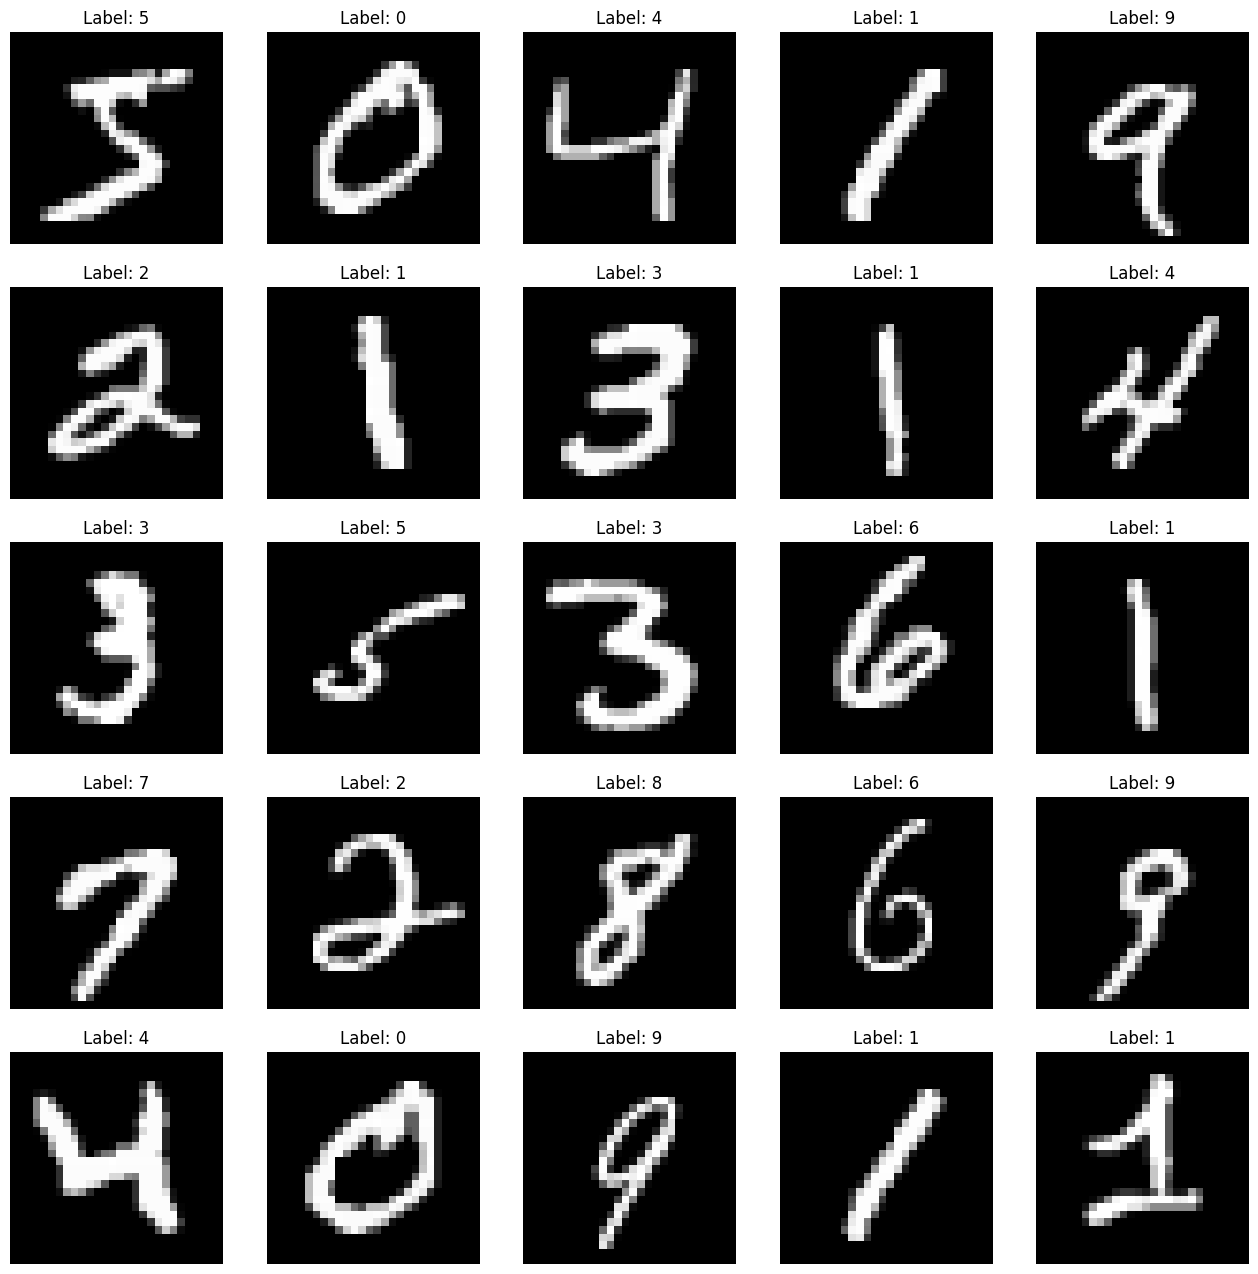

In [6]:
plt.figure(figsize=(16,16))
for i in range(1,26):
    plt.subplot(5, 5, i)
    plt.imshow(X_train[i-1], cmap='gray')
    plt.title(f'Label: {y_train[i-1]}')
    plt.axis('off')
plt.show()

### Data preparation

In [7]:
## Normalize 
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
## convert 2D to 1D
X_train[0].shape

(28, 28)

### Different ways to convert a 2D array to a 1D array(examples)

#### Only for a single image(3 methods)

In [9]:
X_train_1d = np.ravel(X_train[0])
X_train_1d.shape # ravel always returns a 1D array

(784,)

In [10]:
np.reshape(X_train[1], X_train[1].size).shape

(784,)

In [11]:
X_train[1].flatten().shape

(784,)

#### For the whole dataset(2 methods)

In [12]:
temp = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
temp.shape

(60000, 784)

In [13]:
temp = X_train.reshape(-1, X_train[0].size)
temp.shape

(60000, 784)

### Now doing it fr

In [14]:
X_train = X_train.reshape(-1, X_train[0].size)
X_test = X_test.reshape(-1, X_test[0].size)

In [15]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

<Axes: xlabel='count'>

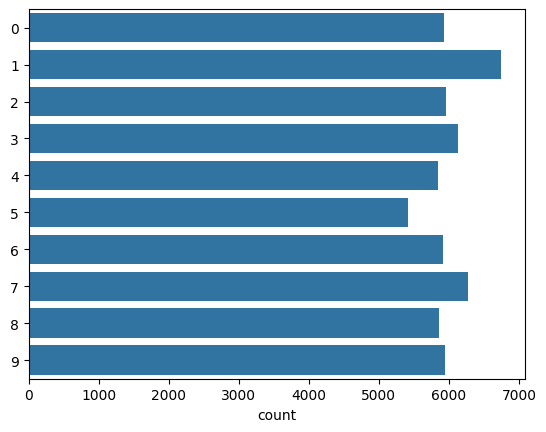

In [16]:
# visually understanding the distribution of classes
sns.countplot(y=y_train)

In [17]:
# one hot encoding the categories in y
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)


In [18]:
y_train_new.shape, y_test_new.shape

((60000, 10), (10000, 10))

### Build the model

In [19]:
# from tensorflow.keras.layers import Input
# model = Sequential()
# model.add(Input(shape=(X_train.shape[1],)))

# model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(10, activation='softmax'))

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

In [26]:
## Normalize 
X_train = X_train / 255.0
X_test = X_test / 255.0

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [21]:
model = Sequential()
model.add(Input(shape=(28, 28, 1)))

# Convoolution and pooling layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

# Hidden Layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [31]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        51,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,178 (254.60 KB)

 Trainable params: 65,178 (254.60 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# !pip install pydot

In [21]:
# !pip install graphviz

In [ ]:
plot_model(model, show_layer_activations=True, show_layer_names=True, show_shapes=True)

### Train the model

In [33]:
history = model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.9066 - loss: 0.2888
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9833 - loss: 0.0558
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9882 - loss: 0.0388
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9917 - loss: 0.0261
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9929 - loss: 0.0237
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9937 - loss: 0.0185
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9942 - loss: 0.0188
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9958 - loss: 0.0132
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9959 - loss: 0.0129
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9962 - loss: 0.0125


In [34]:
history = pd.DataFrame(history.history)

In [35]:
history

,accuracy,loss
0,0.956800,0.138046
1,0.983700,0.054478
2,0.987883,0.038580
3,0.990833,0.030511
4,0.992533,0.023902
5,0.993533,0.019712
6,0.994383,0.018547
7,0.995000,0.015908
8,0.995583,0.014389
9,0.996083,0.012915


### Model Evaluation

In [37]:
# model.evaluate(X_test, y_test_new, batch_size=1)
model.evaluate(X_test, y_test, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9845 - loss: 0.0660


[0.050521474331617355, 0.9886999726295471]

### Predicting on some image from the testing set

In [65]:
X_test[1234].shape

(28, 28)

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

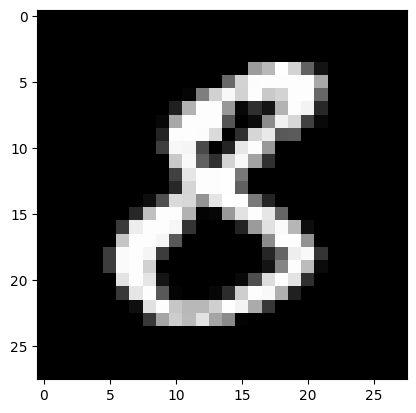

In [67]:
plt.imshow(X_test[1234], cmap='gray')
# plt.title(f'Label: {np.argmax(model.predict(X_test[1234].reshape(1,784)))}') # get the label with the maximum probability after predicting the data that has been reshaped to (1,784)
plt.title(f'Label: {np.argmax(model.predict(X_test[1234]))}') # get the label with the maximum probability after predicting the data that has been reshaped to (1,784)
plt.axis('off')
plt.show()

### predicting on new_char.png

In [39]:
new_char = cv2.imread('new-char.png', 0) # input as gray image

In [40]:
new_char = cv2.resize(new_char, (28,28)) # resize 

In [41]:
new_char.shape

(28, 28)

In [42]:
# normalize
new_char = new_char/255
new_char

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.45490196, 0.49019608, 0.67058824, 1.        , 1.        ,
        0.58823529, 0.3647

In [43]:
# new_char_new = new_char.reshape(1,-1)
# new_char_new.shape
new_char_new = new_char.reshape(1, 28,28)
new_char_new.shape

(1, 28, 28)

In [44]:
probs = model.predict(new_char_new, verbose=False)
print(probs.argmax())

2


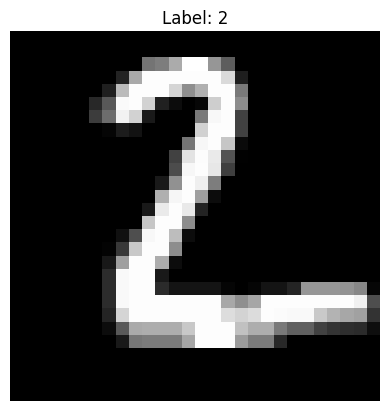

In [45]:
plt.imshow(new_char, cmap='gray')
plt.axis('off')
# plt.title(f'Label: {np.argmax(model.predict(new_char_new))}') 
plt.title(f'Label: {probs.argmax()}') 
plt.show()

#### Another file

In [58]:
new_char1 = cv2.imread('new-char1.jpg', 0)

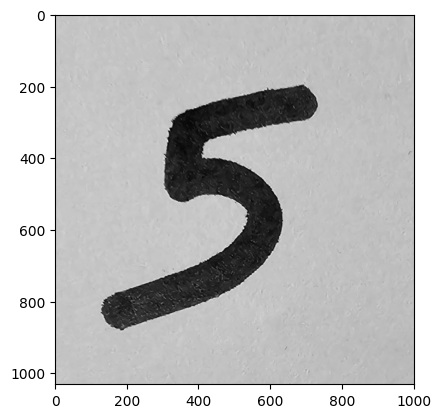

In [59]:
plt.imshow(new_char1, cmap='gray')

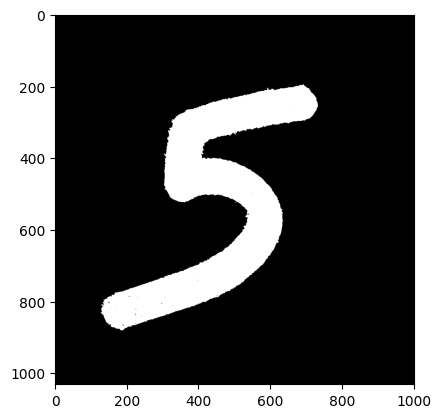

In [60]:
thresh, img_binary = cv2.threshold(new_char1, 120, 255, cv2.THRESH_BINARY_INV)
plt.imshow(img_binary, cmap='gray')


In [61]:
img_binary = cv2.resize(img_binary, (28,28)) # resize
img_binary = img_binary/255 # normalize
img_binary = img_binary.reshape(1, -1)  # reshaping to 1d array

In [62]:
img_binary.shape

(1, 784)

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

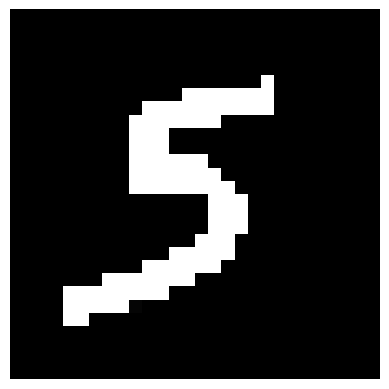

In [68]:
plt.imshow(img_binary.reshape(28,28), cmap='gray')
plt.axis('off')
plt.title(f'Label: {np.argmax(model.predict(img_binary))}') 
plt.show()